In [0]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path_img = "/content/gdrive/My Drive/profile_display_images_concat_np.npy"

In [0]:
path_df = "/content/gdrive/My Drive/InstagramDatasetFinalVersion.csv"

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/InstagramDatasetFinalVersion.csv', encoding='utf-8-sig')

In [0]:
image_data = np.load(path_img, allow_pickle=True)

In [0]:
a = np.load(a, allow_pickle=True).astype(np.float16)

In [0]:
b = np.load(b, allow_pickle=True).astype(np.float16)

In [0]:
a = a.reshape(10334, 128, 200, 3)

In [0]:
b = b.reshape(10334, 128, 200, 3)

In [0]:
c = np.concatenate((a, b))

In [0]:
c = c.reshape(20668, 128, 200, 3)

In [0]:
del a
del b

In [7]:
image_data.shape

(20668, 76800)

In [0]:
image_data = image_data.reshape(20668, 128, 200, 3)

In [9]:
image_data.shape

(20668, 128, 200, 3)

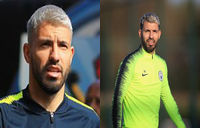

In [10]:
from PIL import Image
img = Image.fromarray(image_data[13])
img

In [0]:
from sklearn.model_selection import train_test_split
split = train_test_split(df, image_data, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

In [0]:
maxPrice = df["number_of_likes/mean"].max()
trainY = trainAttrX["number_of_likes/mean"]/ maxPrice
testY = testAttrX["number_of_likes/mean"]/ maxPrice

In [0]:
model1 = models.Sequential()
model1.add(Conv2D(16, kernel_size=(3, 3), padding = "same", input_shape=(128, 200, 3), activation='relu'))
model1.add(BatchNormalization(axis = -1))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization(axis = -1))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization(axis = -1))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization(axis = -1))
model1.add(Flatten())
model1.add(Dense(1250, activation='relu'))
model1.add(BatchNormalization(axis = -1))
model1.add(Dropout(.5))
model1.add(Dense(250, activation='relu'))
model1.add(BatchNormalization(axis = -1))
model1.add(Dropout(.25))
model1.add(Dense(25, activation='relu'))
model1.add(Dense(1, activation="linear"))
model1.compile(optimizer=optimizers.Adam(lr=1e-04, decay = 1e-04/200), loss='mean_squared_error')

In [16]:
history = model1.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
	epochs=100, batch_size=8)

Train on 15501 samples, validate on 5167 samples
Epoch 1/100
15501/15501 [==============================] - 42s 3ms/step - loss: 0.4491 - val_loss: 0.0352
Epoch 2/100
15501/15501 [==============================] - 41s 3ms/step - loss: 0.0903 - val_loss: 0.0149
Epoch 3/100
15501/15501 [==============================] - 41s 3ms/step - loss: 0.0288 - val_loss: 0.0098
Epoch 4/100
15501/15501 [==============================] - 41s 3ms/step - loss: 0.0164 - val_loss: 0.0087
Epoch 5/100
15501/15501 [==============================] - 40s 3ms/step - loss: 0.0131 - val_loss: 0.0094
Epoch 6/100
15501/15501 [==============================] - 41s 3ms/step - loss: 0.0112 - val_loss: 0.0085
Epoch 7/100
15501/15501 [==============================] - 40s 3ms/step - loss: 0.0105 - val_loss: 0.0080
Epoch 8/100
15501/15501 [==============================] - 41s 3ms/step - loss: 0.0103 - val_loss: 0.0080
Epoch 9/100
15501/15501 [==============================] - 40s 3ms/step - loss: 0.0096 - val_loss: 0.00

In [17]:
preds = model1.predict(testImagesX)
diff = preds.flatten() - testY
Yitemindex = np.where(testY==0)
print(Yitemindex)
minVal = np.amin(testY[testY != np.amin(testY)])
print(minVal)

(array([ 611,  626, 1418, 2078, 3107]),)
0.008646305557331068


In [0]:
np.put(testY, 611, minVal)
np.put(testY, 626, minVal)
np.put(testY, 1418, minVal)
np.put(testY, 2078, minVal)
np.put(testY, 3107, minVal)

In [19]:
percentDiff = (diff / testY) * 100

absPercentDiff = np.abs(percentDiff)
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("avg likes/mean:")
print(df["number_of_likes/mean"].mean())
print("std likes/mean:")
print(df["number_of_likes/mean"].std())
print("mean absolute percentage difference: {:.2f}%, std absolute percentage difference.: {:.2f}%".format(mean, std))

avg likes/mean:
1.0000000000000009
std likes/mean:
0.5068692569675557
mean absolute percentage difference: 60.86%, std absolute percentage difference.: 131.89%


In [0]:
maxPrice = df["number_of_likes/mean"].max()
yVal = df["number_of_likes/mean"]/ maxPrice

In [14]:
preds_full = model1.predict(image_data)
diff1 = preds_full.flatten() - yVal
Yitemindex = np.where(yVal==0)
print(Yitemindex)
minVal = np.amin(yVal[yVal != np.amin(yVal)])
print(minVal)

(array([ 1200,  1201,  1202,  1203,  8673,  8678, 18779]),)
0.0012154466092707831


In [15]:
np.put(yVal, 1200, minVal)
np.put(yVal, 1201, minVal)
np.put(yVal, 1202, minVal)
np.put(yVal, 1203, minVal)
np.put(yVal, 8673, minVal)
np.put(yVal, 8678, minVal)
np.put(yVal, 18779, minVal)

percentDiff1 = (diff1 / yVal) * 100

absPercentDiff1 = np.abs(percentDiff1)
mean1 = np.mean(absPercentDiff1)
std1 = np.std(absPercentDiff1)
 
import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("avg likes/mean:")
print(df["number_of_likes/mean"].mean())
print("std likes/mean:")
print(df["number_of_likes/mean"].std())
print("mean absolute percentage difference: {:.2f}%, std absolute percentage difference.: {:.2f}%".format(mean1, std1))

avg likes/mean:
1.0000000000000009
std likes/mean:
0.5068692569675557
mean absolute percentage difference: 66.78%, std absolute percentage difference.: 314.04%


In [20]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(testY, preds)))
print(np.sqrt(metrics.mean_squared_error(yVal, preds_full)))

0.08660819211728843
0.08499803920263498


In [21]:
print(metrics.r2_score(testY, preds))
print(metrics.r2_score(yVal, preds_full))

-0.009416296803220314
-0.00817184755992506


In [0]:
preds_full = preds_full.reshape((20668,))

In [0]:
Y1 = df["number_of_likes/mean"]
preds_full = preds_full * maxPrice

In [24]:
compare = pd.DataFrame({'Prediction': preds_full, 'Actual' : Y1})
compare.head(23)

,Prediction,Actual
0,1.005069,0.697678
1,1.006001,1.132276
2,1.004199,0.641902
3,1.007447,1.072790
4,1.007447,1.059753
5,1.007447,1.177626
6,1.007447,1.101678
7,1.004807,1.154272
8,1.007037,1.012914
9,1.007447,1.057489


In [0]:
Small_difference = abs((df["number_of_likes/mean"].values) - preds_full)  < 0.05
med_difference = abs((df["number_of_likes/mean"].values) - preds_full)  < 0.25
Big_difference = abs((df["number_of_likes/mean"].values) - preds_full)  > 0.5

In [26]:
df[Small_difference].shape[0]

1986

In [29]:
df[med_difference].shape[0]

9211

In [30]:
idx_vals = df[Small_difference].index.values
idx_big_vals = df[Big_difference].index.values
compare1 = compare.ix[idx_vals]
compare2 = compare.ix[idx_big_vals]
compare1.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Prediction,Actual
8,1.007037,1.012914
18,1.007447,0.963547
23,1.007447,1.055596
40,1.007447,0.958649
44,1.007447,0.979309
46,1.007447,0.979036
54,1.007447,1.018425
67,1.007447,1.001424
69,1.007284,1.029386
80,1.098935,1.139697


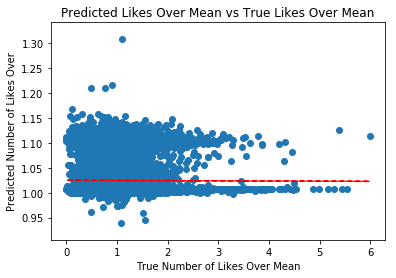

In [31]:
from  matplotlib import pyplot 
pyplot.scatter(df["number_of_likes/mean"].values, preds_full)
z = np.polyfit(df["number_of_likes/mean"].values, preds_full, 1)
p = np.poly1d(z)
pyplot.plot(df["number_of_likes/mean"].values,p(df["number_of_likes/mean"].values),"r--")
pyplot.title("Predicted Likes Over Mean vs True Likes Over Mean")
pyplot.xlabel("True Number of Likes Over Mean")
pyplot.ylabel("Predicted Number of Likes Over")
pyplot.show()

In [0]:
model1.save("/content/gdrive/My Drive/batch_norm_model.h5")

In [12]:
from keras.models import load_model
model1 = load_model('/content/gdrive/My Drive/batch_norm_model.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
